In [111]:
import torch
import torch.nn as nn
import torch.functional as F
from torch.nn.modules import loss
import numpy as np
import matplotlib.pyplot as plt

# CrossEntropyLoss

<iframe src="https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html#crossentropyloss" width=1000 height=400></iframe>

## unbatched

### with index

In [112]:
y_hat = torch.randn(4)
y = y_hat.argmax()

print(f"ŷ = {y_hat}")
print(f"y = {y}")

ŷ = tensor([ 1.0789,  0.8601,  0.6842, -0.3649])
y = 0


In [113]:
nn.CrossEntropyLoss()(y_hat, y), nn.CrossEntropyLoss(reduction='mean')(y_hat, y)

(tensor(0.9982), tensor(0.9982))

In [114]:
y = [0]*len(y_hat)
y[y_hat.argmax()] = 1
y = torch.FloatTensor(y)

print(f"ŷ = {y_hat}")
print(f"y = {y}")

ŷ = tensor([ 1.0789,  0.8601,  0.6842, -0.3649])
y = tensor([1., 0., 0., 0.])


In [115]:
nn.CrossEntropyLoss()(y_hat, y)

tensor(0.9982)

---

In [116]:
from PIL import ImageFont
from PIL import Image
from PIL import ImageDraw
from pathlib import Path


fonts = {
    'Arial': [],
    'Georgia': [],
}

fonts_path = Path('resource') / 'fonts'
for f in fonts:
    for i in range(ord('A'), ord('Z')+1):
        font = ImageFont.truetype(str((fonts_path/f'{f}.ttf').absolute()), 500)
        img = Image.new('RGB', (512,512), (0,0,0))
        draw = ImageDraw.Draw(img)
        draw.text((256,256), chr(i), (255,255,255), font=font, anchor='mm')
        draw = ImageDraw.Draw(img)

        fonts[f].append(img)

In [117]:
for k, v in fonts.items():
    fonts[k] = dict(zip(map(chr, range(ord('A'), ord('Z')+1)), v))

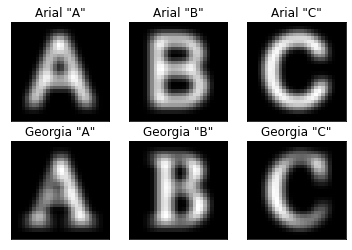

In [118]:
from torchvision import transforms

T = transforms.Compose([
    transforms.Resize(28),
    transforms.Grayscale(),
    transforms.GaussianBlur(5, (2,2)),
])

arial_a = T(fonts['Arial']['A'])
arial_b = T(fonts['Arial']['B'])
arial_c = T(fonts['Arial']['C'])
georgia_a = T(fonts['Georgia']['A'])
georgia_b = T(fonts['Georgia']['B'])
georgia_c = T(fonts['Georgia']['C'])

plt.figure(figsize=(6,4))
plt.subplot(231)
plt.title('Arial "A"')
plt.imshow(arial_a, cmap='binary_r')
plt.xticks([])
plt.yticks([])

plt.subplot(232)
plt.title('Arial "B"')
plt.imshow(arial_b, cmap='binary_r')
plt.xticks([])
plt.yticks([])

plt.subplot(233)
plt.title('Arial "C"')
plt.imshow(arial_c, cmap='binary_r')
plt.xticks([])
plt.yticks([])

plt.subplot(234)
plt.title('Georgia "A"')
plt.imshow(georgia_a, cmap='binary_r')
plt.xticks([])
plt.yticks([])

plt.subplot(235)
plt.title('Georgia "B"')
plt.imshow(georgia_b, cmap='binary_r')
plt.xticks([])
plt.yticks([])

plt.subplot(236)
plt.title('Georgia "C"')
plt.imshow(georgia_c, cmap='binary_r')
plt.xticks([])
plt.yticks([])
plt.show()

In [119]:
T = transforms.Compose([
    transforms.Resize(28),
    transforms.Grayscale(),
    transforms.GaussianBlur(5, (2,2)),
    transforms.ToTensor(),
])

arial_a = T(fonts['Arial']['A'])
arial_b = T(fonts['Arial']['B'])
arial_c = T(fonts['Arial']['C'])
georgia_a = T(fonts['Georgia']['A'])
georgia_b = T(fonts['Georgia']['B'])
georgia_c = T(fonts['Georgia']['C'])

crossentropy = nn.CrossEntropyLoss()
print(f'Arial "A" <-> Georgia "A" {crossentropy(arial_a, georgia_a).item():7.3f}')
print(f'Arial "A" <-> Georgia "B" {crossentropy(arial_a, georgia_b).item():7.3f}')
print(f'Arial "A" <-> Georgia "C" {crossentropy(arial_a, georgia_c).item():7.3f}')
print()

print(f'Arial "B" <-> Georgia "A" {crossentropy(arial_b, georgia_a).item():7.3f}')
print(f'Arial "B" <-> Georgia "B" {crossentropy(arial_b, georgia_b).item():7.3f}')
print(f'Arial "B" <-> Georgia "C" {crossentropy(arial_b, georgia_c).item():7.3f}')
print()

print(f'Arial "C" <-> Georgia "A" {crossentropy(arial_c, georgia_a).item():7.3f}')
print(f'Arial "C" <-> Georgia "B" {crossentropy(arial_c, georgia_b).item():7.3f}')
print(f'Arial "C" <-> Georgia "C" {crossentropy(arial_c, georgia_c).item():7.3f}')
print()

Arial "A" <-> Georgia "A"  10.963
Arial "A" <-> Georgia "B"  15.280
Arial "A" <-> Georgia "C"  11.104

Arial "B" <-> Georgia "A"  11.414
Arial "B" <-> Georgia "B"  15.090
Arial "B" <-> Georgia "C"  10.783

Arial "C" <-> Georgia "A"  11.678
Arial "C" <-> Georgia "B"  15.334
Arial "C" <-> Georgia "C"  10.565

